In [2]:
import os
import shutil

In [4]:
source=r"Downloads/kaggle.json"
destination=os.path.expanduser(r"~\kaggle\kaggle.json") 
os.makedirs(os.path.dirname(destination), exist_ok=True)

shutil.move(source, destination)

print("Moved successfully")

Moved successfully


In [8]:
import pandas as pd

In [2]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [15]:
!kaggle datasets download -d "atharvasoundankar/spotify-global-streaming-data-2024

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/spotify-global-streaming-data-2024
License(s): apache-2.0




  0%|          | 0.00/27.4k [00:00<?, ?B/s]
100%|##########| 27.4k/27.4k [00:00<00:00, 154kB/s]
100%|##########| 27.4k/27.4k [00:00<00:00, 153kB/s]


In [16]:
import zipfile

with zipfile.ZipFile("spotify-global-streaming-data-2024.zip", "r") as zip_ref:
    zip_ref.extractall()

In [5]:
os.listdir()

['.accessibility.properties',
 '.anaconda',
 '.conda',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.kaggle',
 '.matplotlib',
 '.ms-ad',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'Cleaned_Spotify_2024_Global_Streaming_Data.csv',
 'Contacts',
 'Cookies',
 'dataset.ipynb',
 'Documents',
 'Downloads',
 'Favorites',
 'kaggle',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{14a50da7-ca67-11f0-89f4-388d3dfbb8f7}.TM.blf',
 'NTUSER.DAT{14a50da7-ca67-11f0-89f4-388d3dfbb8f7}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{14a50da7-ca67-11f0-89f4-388d3dfbb8f7}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'PrintHood',
 'python.ipynb',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'spotify',
 'spotify-global-streaming-data-2024.zip',
 'spotify.txt',
 'Spotify_2024_Global_Streaming_Data.csv',
 'Start Menu',
 'Template

In [7]:
import pandas as pd

df = pd.read_csv("Spotify_2024_Global_Streaming_Data.csv")
df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [27]:
df.isnull().sum()

Country                            0
Artist                             0
Album                              0
Genre                              0
Release Year                       0
Monthly Listeners (Millions)       0
Total Streams (Millions)           0
Total Hours Streamed (Millions)    0
Avg Stream Duration (Min)          0
Platform Type                      0
Streams Last 30 Days (Millions)    0
Skip Rate (%)                      0
dtype: int64

In [19]:
df.dtypes


Country                             object
Artist                              object
Album                               object
Genre                               object
Release Year                         int64
Monthly Listeners (Millions)       float64
Total Streams (Millions)           float64
Total Hours Streamed (Millions)    float64
Avg Stream Duration (Min)          float64
Platform Type                       object
Streams Last 30 Days (Millions)    float64
Skip Rate (%)                      float64
dtype: object

In [20]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [9]:
df.groupby("Genre")["Total Streams (Millions)"].sum().idxmax()


'Classical'

In [22]:
df["Skip Rate (%)"].mean()


np.float64(20.370459999999998)

In [23]:
df["Release Year"].max()


2023

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

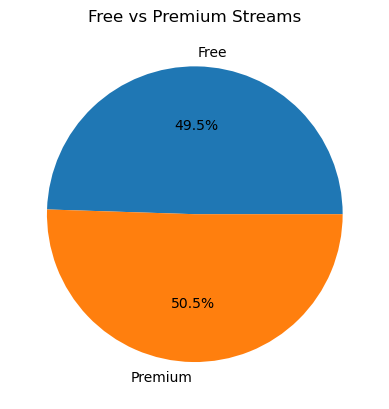

In [25]:
platform = df.groupby("Platform Type")["Total Streams (Millions)"].sum()

platform.plot(kind="pie", autopct="%1.1f%%")
plt.title("Free vs Premium Streams")
plt.ylabel("")
plt.show()

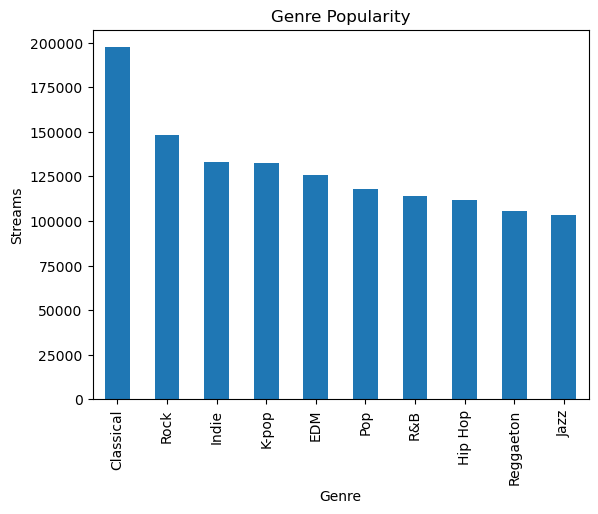

In [26]:
genre = df.groupby("Genre")["Total Streams (Millions)"].sum().sort_values(ascending=False)

genre.plot(kind="bar")
plt.title("Genre Popularity")
plt.xlabel("Genre")
plt.ylabel("Streams")
plt.show()

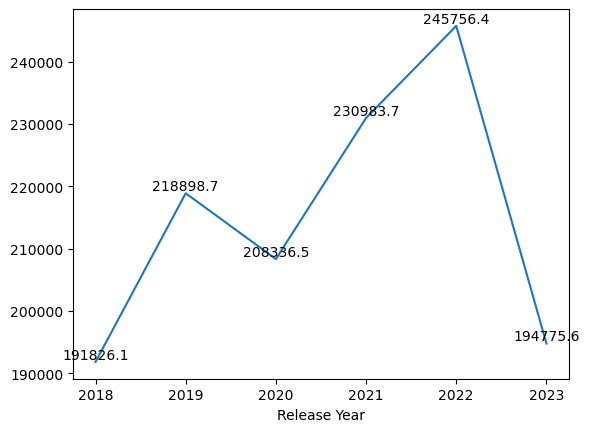

In [15]:
ax = df.groupby("Release Year")["Total Streams (Millions)"].sum().plot()

for x, y in zip(ax.lines[0].get_xdata(), ax.lines[0].get_ydata()):
    ax.text(x, y, f"{y:.1f}", ha="center", va="bottom")

plt.show()

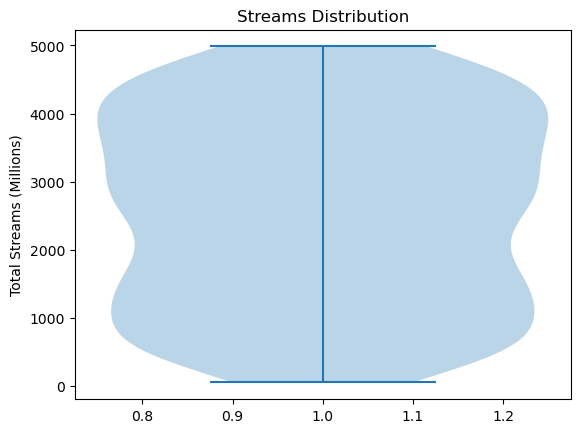

count     500.000000
mean     2581.154080
std      1416.055972
min        53.560000
25%      1337.337500
50%      2697.355000
75%      3798.197500
max      4985.540000
Name: Total Streams (Millions), dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Spotify_2024_Global_Streaming_Data.csv")

plt.violinplot(df["Total Streams (Millions)"])
plt.title("Streams Distribution")
plt.ylabel("Total Streams (Millions)")
plt.show()


table = df["Total Streams (Millions)"].describe()
print(table)
